In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
resenha = pd.read_csv('imdb-reviews-pt-br.csv')

In [3]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

In [4]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha['text_pt'], resenha['sentiment'], random_state=42)

In [5]:
print('Negativa \n')
print(resenha['text_pt'][189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [6]:
print('Positivo \n')
print(resenha['text_pt'][49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [ ]:
print(resenha['sentiment'].value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [ ]:
classificacao = resenha['sentiment'].replace(['neg', 'pos'], [0, 1])
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [ ]:
resenha['classificacao'] = classificacao

In [ ]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0  
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0  
4  Filmes de fotos de latão não é uma palavra apr...       neg              0

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Assisti um filme ótimo', 'Assisti um filme ruim']
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [ ]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [ ]:
matriz_esparsa

Assisti  filme  ruim  um  ótimo
0        1      1     0   1      1
1        1      1     1   1      0

In [ ]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha['text_pt'])
print(bag_of_words.shape)

(49459, 50)


In [ ]:
regressao_logistica = LogisticRegression()

In [ ]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

In [ ]:
print(classificar_texto(resenha, 'text_pt', 'classificacao'))

0.6583097452486858


In [ ]:
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha['text_pt']])

In [ ]:
print(len(todas_palavras))

63448424


In [ ]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

In [ ]:
nuvem_palavras

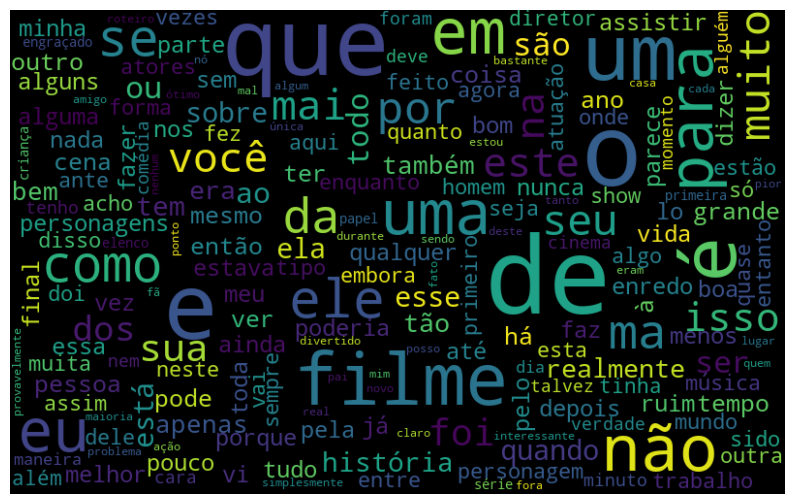

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
resenha.query('sentiment == "pos"')

id                                            text_en  \
12389  12391  I went and saw this movie last night after bei...   
12390  12392  Actor turned director Bill Paxton follows up h...   
12391  12393  As a recreational golfer with some knowledge o...   
12392  12394  I saw this film in a sneak preview, and it is ...   
12393  12395  Bill Paxton has taken the true story of the 19...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
12389  Eu fui e vi este filme ontem à noite depois de...       pos   
12390  O diretor do ator, Bill Paxton, segue sua prom...       pos   
12391  Como um jogador de recreio com algum conhecime...       pos   
12392  Eu vi esse filme em uma prévia, e é delicioso....       pos   
12393  Bill Paxton levou a verdadeira história do gol...       pos   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao  
12389              1  
12390              1  
12391              1  
12392              1  
12393              1  
...              ...  
49454              1  
49455              1  
49456              1  
49457              1  
49458              1  

[24694 rows x 5 columns]

In [ ]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query('sentiment == "neg"')
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query('sentiment == "pos"')
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

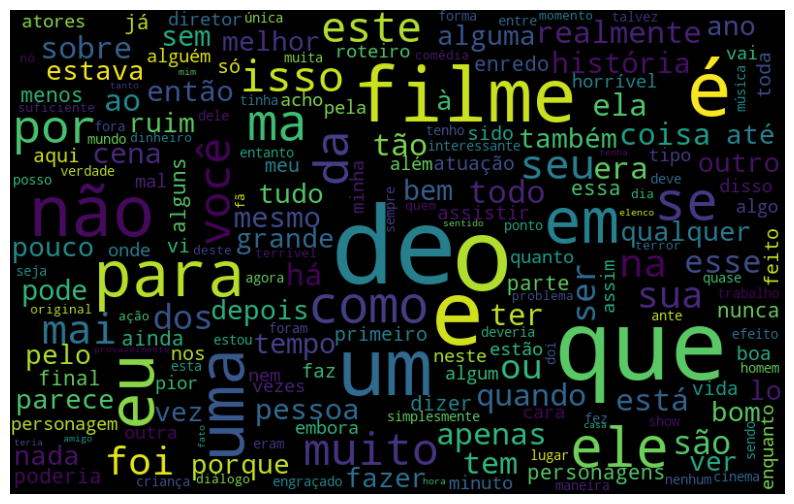

In [ ]:
nuvem_palavras_neg(resenha, 'text_pt')

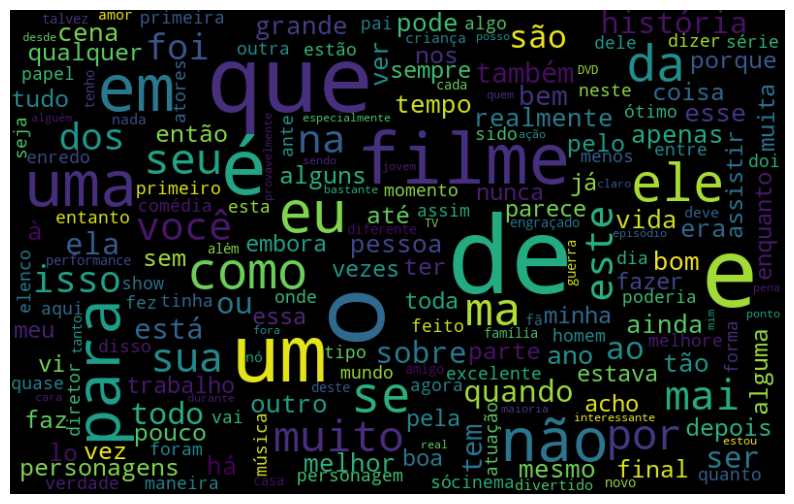

In [ ]:
nuvem_palavras_pos(resenha, 'text_pt')

In [ ]:
import nltk

frase = ['um filme ruim', 'um filme bom']
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [ ]:
from nltk import tokenize

frase = 'Bem vindo ao mundo do PLN!'
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']

In [ ]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [ ]:
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [ ]:
df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()), 'Frequencia': list(frequencia.values())})
df_frequencia.head()

Palavra  Frequencia
0    Mais        1538
1     uma      130888
2    vez,        1927
3       o      244881
4     Sr.        1741

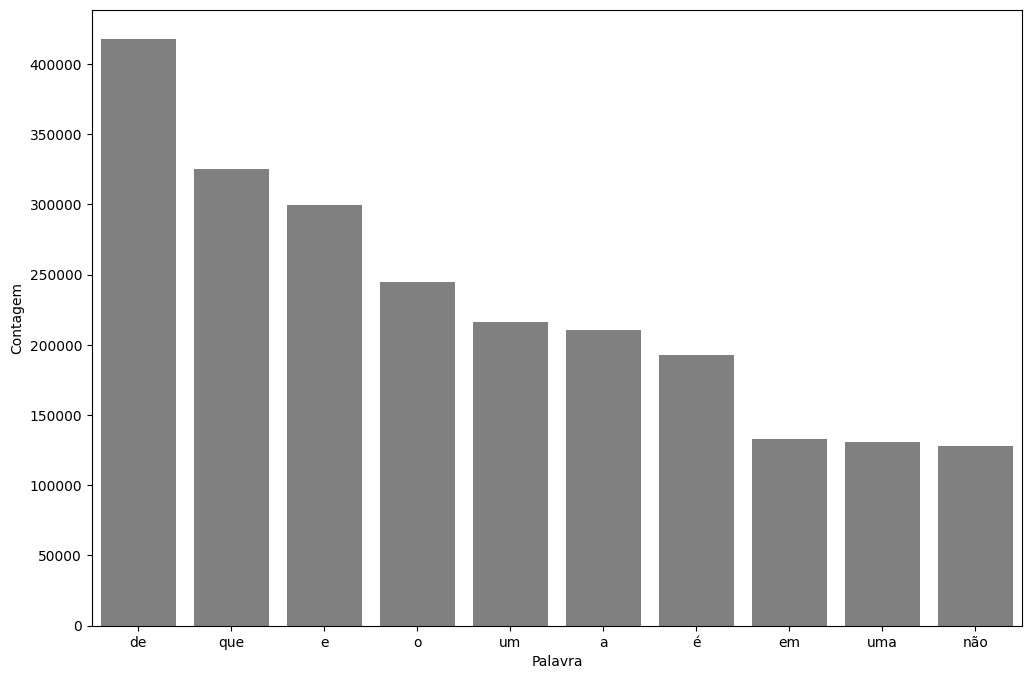

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequencia', n=10), x='Palavra', y='Frequencia', color='gray')
ax.set(ylabel='Contagem')
plt.show()

In [ ]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()), 'Frequencia': list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns='Frequencia', n=quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df_frequencia, x='Palavra', y='Frequencia', color='gray')
    ax.set(ylabel='Contagem')
    plt.show()

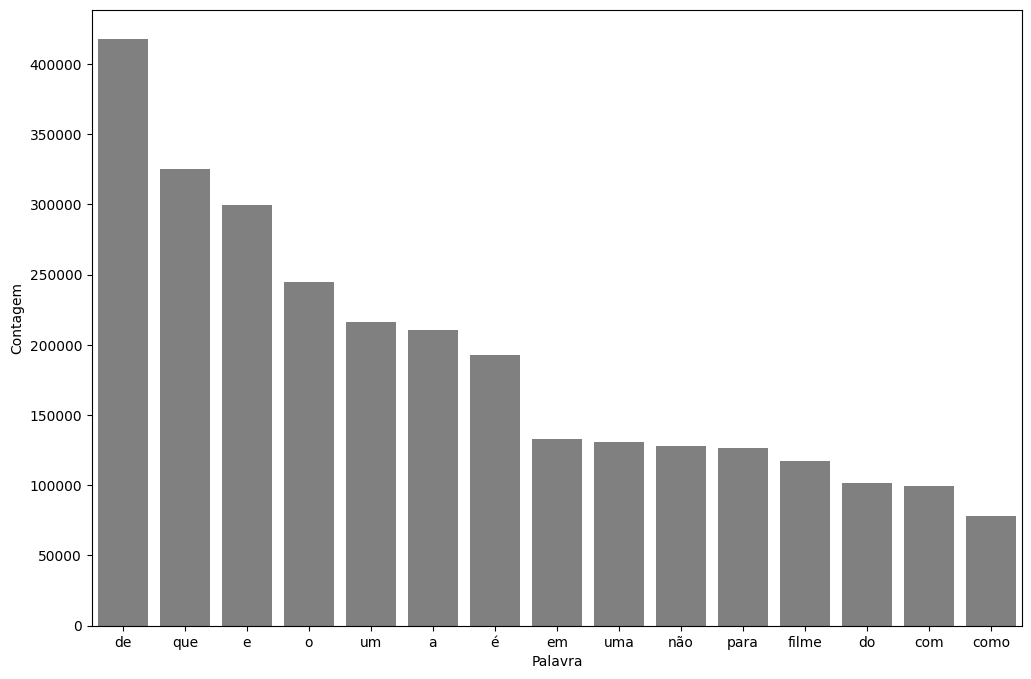

In [ ]:
pareto(resenha, 'text_pt', 15)

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [ ]:
frase_processada = list()
for opiniao in resenha['text_pt']:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_1'] = frase_processada

In [ ]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  
0  Mais vez, Sr. Costner arrumou filme tempo nece...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis, poderiam agi...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada eles, ve...

In [ ]:
classificar_texto(resenha, 'tratamento_1', 'classificacao')

0.6811160533764659

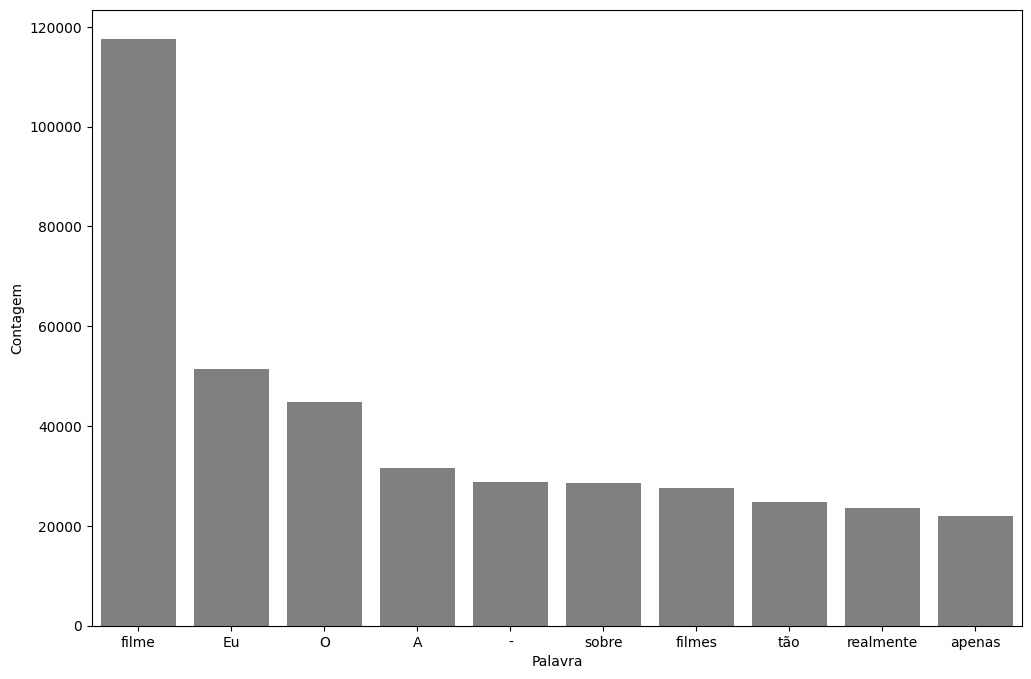

In [ ]:
pareto(resenha, 'tratamento_1', 10)

In [ ]:
from nltk import tokenize

frase = 'Olá mundo!'
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [ ]:
from string import punctuation

punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes
frase_processada = list()
for opiniao in resenha['tratamento_1']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_2'] = frase_processada

In [ ]:
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao                                       tratamento_1  \
0                  0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1                  0  Este exemplo motivo maioria filmes ação mesmos...   
2                  0  Primeiro tudo odeio raps imbecis, poderiam agi...   
3                  0  Nem Beatles puderam escrever músicas todos gos...   
4                  0  Filmes fotos latão palavra apropriada eles, ve...   
...              ...                                                ...   
49454              1  Como média votos baixa, fato funcionário locad...   
49455              1  O enredo algumas reviravoltas infelizes inacre...   
49456              1  Estou espantado forma filme maioria outros méd...   
49457              1  A Christmas Together realmente veio antes temp...   
49458              1  O drama romântico classe trabalhadora diretor ...   

                                            tratamento_2  
0      Mais vez Sr Costner arrumou filme tempo necess...  
1      Este exemplo motivo maioria filmes ação mesmos...  
2      Primeiro tudo odeio raps imbecis poderiam agir...  
3      Nem Beatles puderam escrever músicas todos gos...  
4      Filmes fotos latão palavra apropriada verdade ...  
...                                                  ...  
49454  Como média votos baixa fato funcionário locado...  
49455  O enredo algumas reviravoltas infelizes inacre...  
49456  Estou espantado forma filme maioria outros méd...  
49457  A Christmas Together realmente veio antes temp...  
49458  O drama romântico classe trabalhadora diretor ...  

[49459 rows x 7 columns]

In [ ]:
resenha['tratamento_2'][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

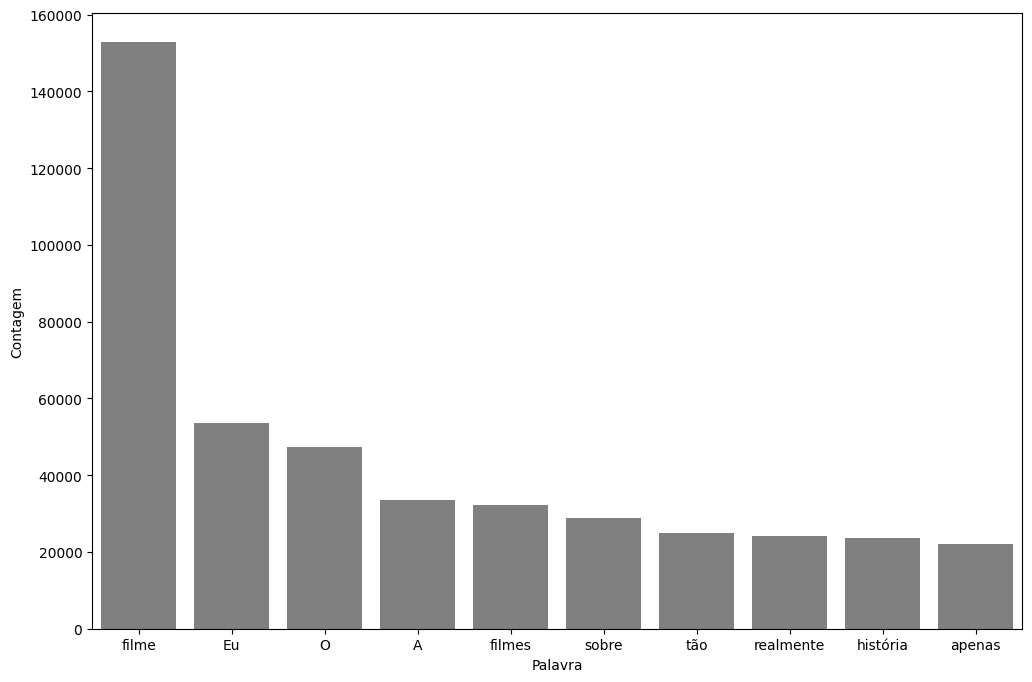

In [ ]:
pareto(resenha, 'tratamento_2', 10)

In [ ]:
import unidecode

acentos = 'Péssimo Ótimo não é tão'
teste = unidecode.unidecode(acentos)
teste

'Pessimo Otimo nao e tao'

In [ ]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]

In [ ]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [ ]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [ ]:
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [ ]:
resenha['tratamento_3'] = sem_acentos

frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_3'] = frase_processada

In [ ]:
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao                                       tratamento_1  \
0                  0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1                  0  Este exemplo motivo maioria filmes ação mesmos...   
2                  0  Primeiro tudo odeio raps imbecis, poderiam agi...   
3                  0  Nem Beatles puderam escrever músicas todos gos...   
4                  0  Filmes fotos latão palavra apropriada eles, ve...   
...              ...                                                ...   
49454              1  Como média votos baixa, fato funcionário locad...   
49455              1  O enredo algumas reviravoltas infelizes inacre...   
49456              1  Estou espantado forma filme maioria outros méd...   
49457              1  A Christmas Together realmente veio antes temp...   
49458              1  O drama romântico classe trabalhadora diretor ...   

                                            tratamento_2  \
0      Mais vez Sr Costner arrumou filme tempo necess...   
1      Este exemplo motivo maioria filmes ação mesmos...   
2      Primeiro tudo odeio raps imbecis poderiam agir...   
3      Nem Beatles puderam escrever músicas todos gos...   
4      Filmes fotos latão palavra apropriada verdade ...   
...                                                  ...   
49454  Como média votos baixa fato funcionário locado...   
49455  O enredo algumas reviravoltas infelizes inacre...   
49456  Estou espantado forma filme maioria outros méd...   
49457  A Christmas Together realmente veio antes temp...   
49458  O drama romântico classe trabalhadora diretor ...   

                                            tratamento_3  
0      Mais vez Sr Costner arrumou filme tempo necess...  
1      Este exemplo motivo maioria filmes acao mesmos...  
2      Primeiro tudo odeio raps imbecis poderiam agir...  
3      Nem Beatles puderam escrever musicas todos gos...  
4      Filmes fotos latao palavra apropriada verdade ...  
...                                                  ...  
49454  Como media votos baixa fato funcionario locado...  
49455  O enredo algumas reviravoltas infelizes inacre...  
49456  Estou espantado forma filme maioria outros med...  
49457  A Christmas Together realmente veio antes temp...  
49458  O drama romantico classe trabalhadora diretor ...  

[49459 rows x 8 columns]

In [ ]:
acuracia_tratamento_3 = classificar_texto(resenha, 'tratamento_3', 'classificacao')
acuracia_tratamento_3

0.6887990295188031

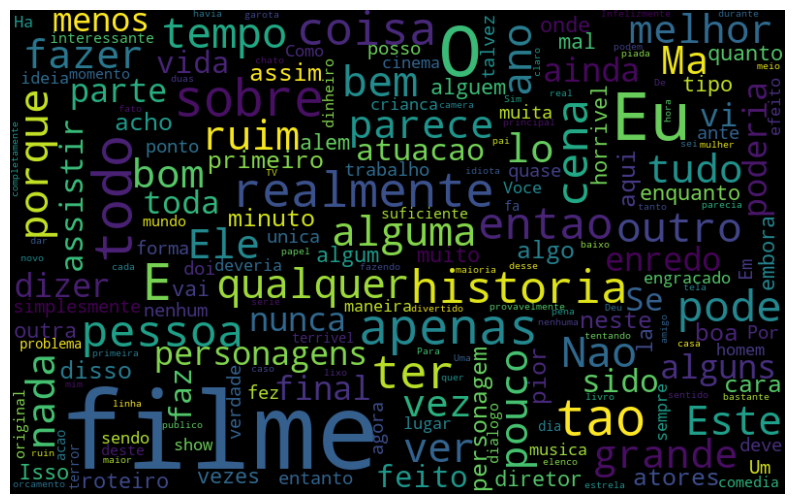

In [ ]:
nuvem_palavras_neg(resenha, 'tratamento_3')

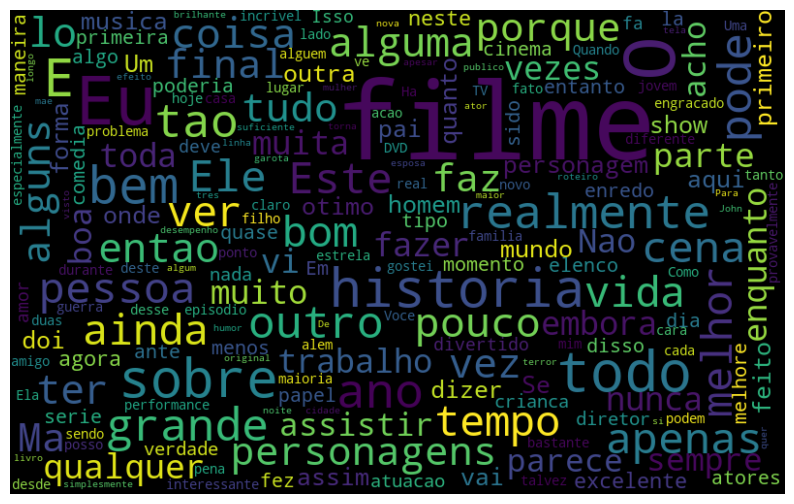

In [ ]:
nuvem_palavras_pos(resenha, 'tratamento_3')

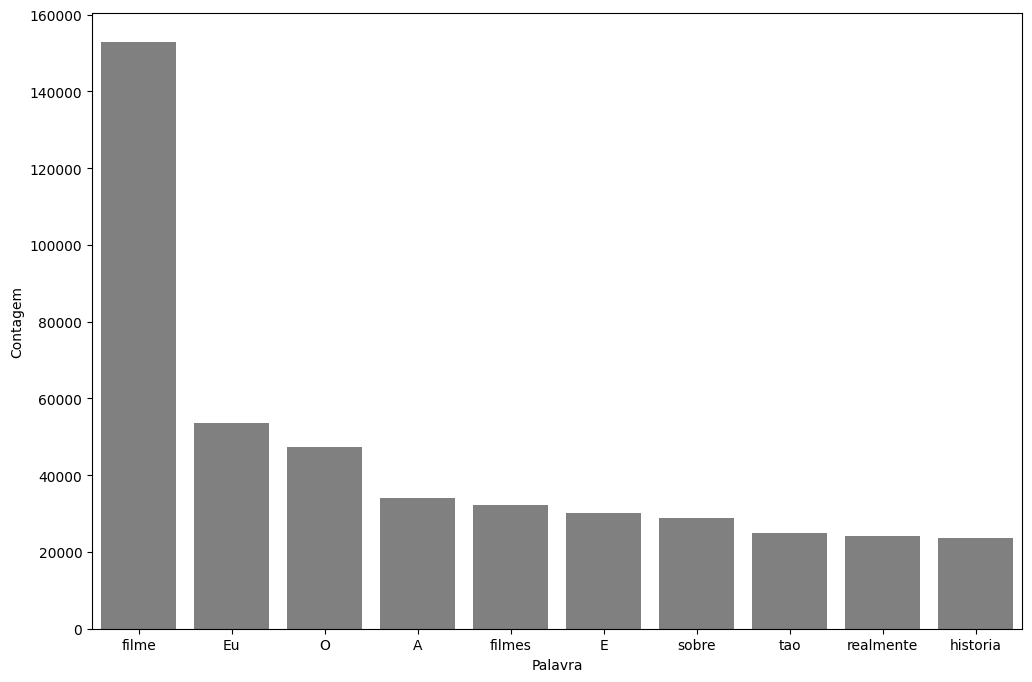

In [ ]:
pareto(resenha, 'tratamento_3', 10)

In [ ]:
frase = 'O Thiago é o novo Instrutor'
frase.lower()

'o thiago é o novo instrutor'

In [ ]:
frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_4'] = frase_processada

In [ ]:
resenha['text_pt'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [ ]:
resenha['tratamento_4'][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [ ]:
acuracia_tratamento_4 = classificar_texto(resenha, 'tratamento_4', 'classificacao')
acuracia_tratamento_4

0.6874241811564901

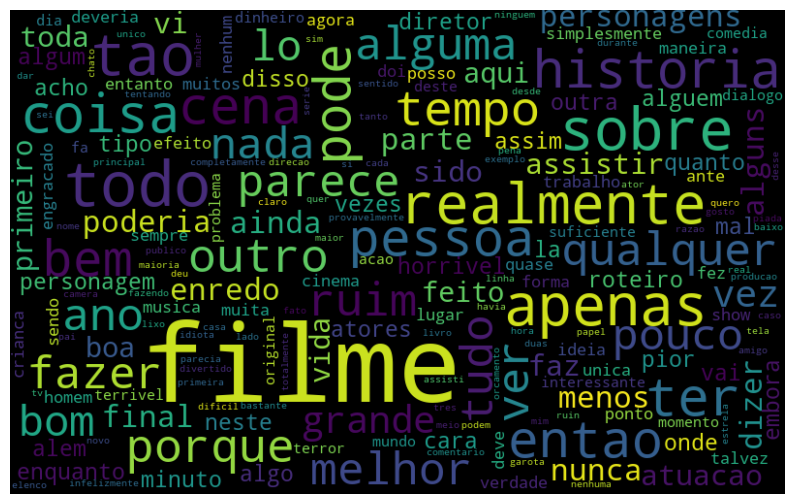

In [ ]:
nuvem_palavras_neg(resenha, 'tratamento_4')

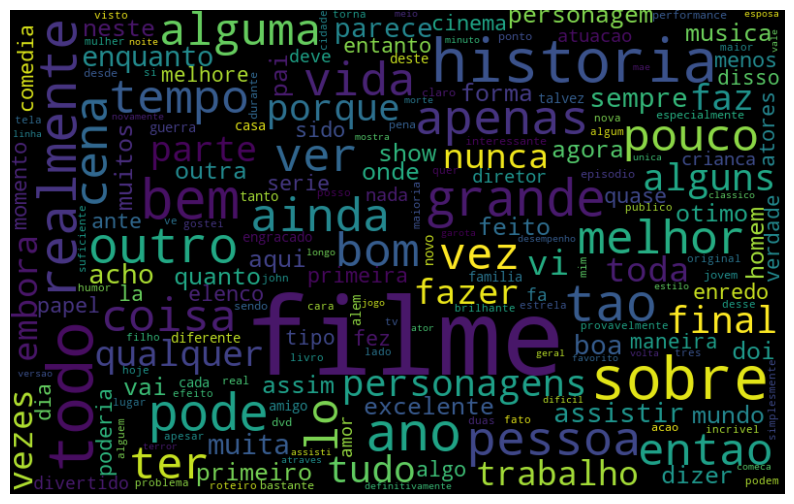

In [ ]:
nuvem_palavras_pos(resenha, 'tratamento_4')

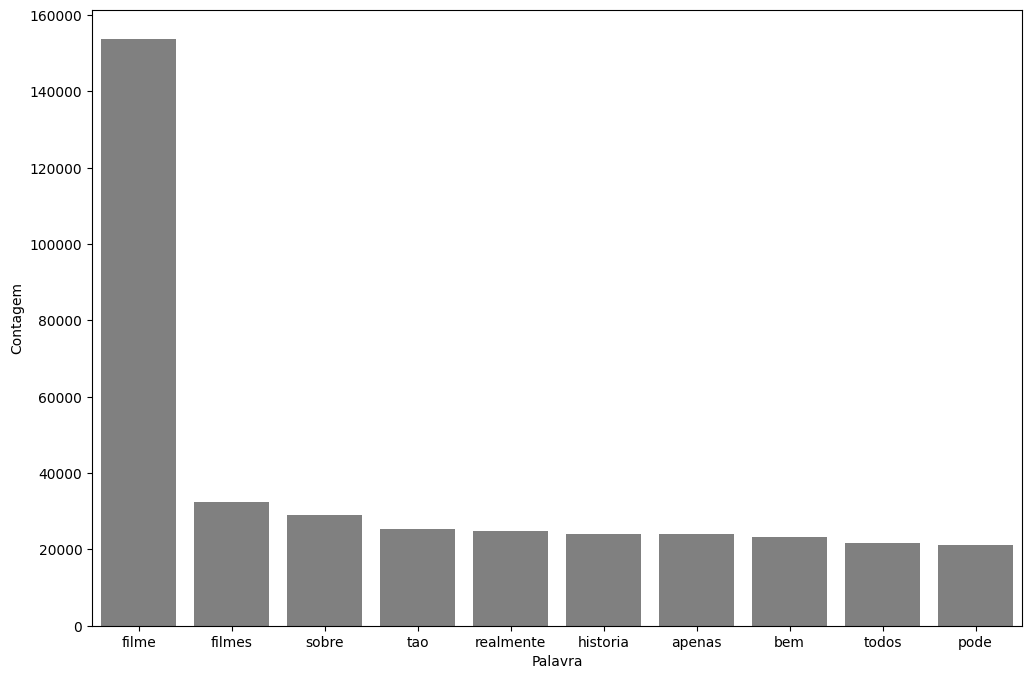

In [ ]:
pareto(resenha, 'tratamento_4', 10)

In [ ]:
stemmer = nltk.RSLPStemmer()
stemmer.stem('lutador')

'lut'

In [ ]:
frase_processada = list()
for opiniao in resenha['tratamento_4']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_5'] = frase_processada

In [ ]:
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao                                       tratamento_1  \
0                  0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1                  0  Este exemplo motivo maioria filmes ação mesmos...   
2                  0  Primeiro tudo odeio raps imbecis, poderiam agi...   
3                  0  Nem Beatles puderam escrever músicas todos gos...   
4                  0  Filmes fotos latão palavra apropriada eles, ve...   
...              ...                                                ...   
49454              1  Como média votos baixa, fato funcionário locad...   
49455              1  O enredo algumas reviravoltas infelizes inacre...   
49456              1  Estou espantado forma filme maioria outros méd...   
49457              1  A Christmas Together realmente veio antes temp...   
49458              1  O drama romântico classe trabalhadora diretor ...   

                                            tratamento_2  \
0      Mais vez Sr Costner arrumou filme tempo necess...   
1      Este exemplo motivo maioria filmes ação mesmos...   
2      Primeiro tudo odeio raps imbecis poderiam agir...   
3      Nem Beatles puderam escrever músicas todos gos...   
4      Filmes fotos latão palavra apropriada verdade ...   
...                                                  ...   
49454  Como média votos baixa fato funcionário locado...   
49455  O enredo algumas reviravoltas infelizes inacre...   
49456  Estou espantado forma filme maioria outros méd...   
49457  A Christmas Together realmente veio antes temp...   
49458  O drama romântico classe trabalhadora diretor ...   

                                            tratamento_3  \
0      Mais vez Sr Costner arrumou filme tempo necess...   
1      Este exemplo motivo maioria filmes acao mesmos...   
2      Primeiro tudo odeio raps imbecis poderiam agir...   
3      Nem Beatles puderam escrever musicas todos gos...   
4      Filmes fotos latao palavra apropriada verdade ...   
...                                                  ...   
49454  Como media votos baixa fato funcionario locado...   
49455  O enredo algumas reviravoltas infelizes inacre...   
49456  Estou espantado forma filme maioria outros med...   
49457  A Christmas Together realmente veio antes temp...   
49458  O drama romantico classe trabalhadora diretor ...   

                     

In [ ]:
acuracia_tratamento_5 = classificar_texto(resenha, 'tratamento_5', 'classificacao')
acuracia_tratamento_5

0.6954306510311363

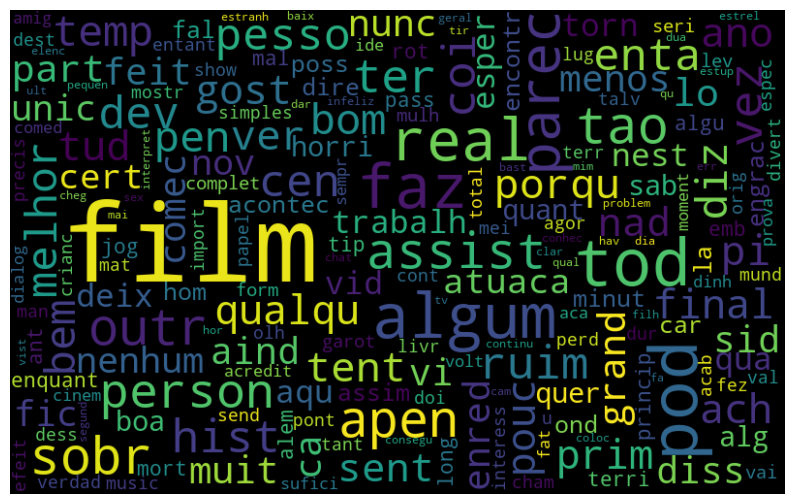

In [ ]:
nuvem_palavras_neg(resenha, 'tratamento_5')

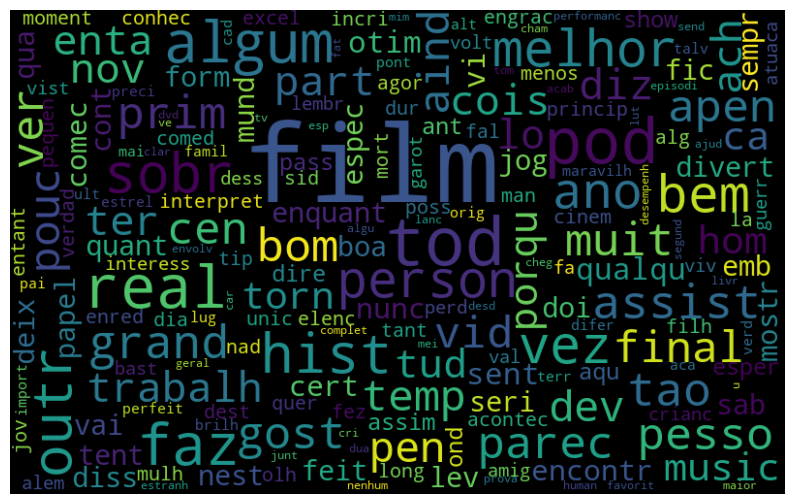

In [ ]:
nuvem_palavras_pos(resenha, 'tratamento_5')

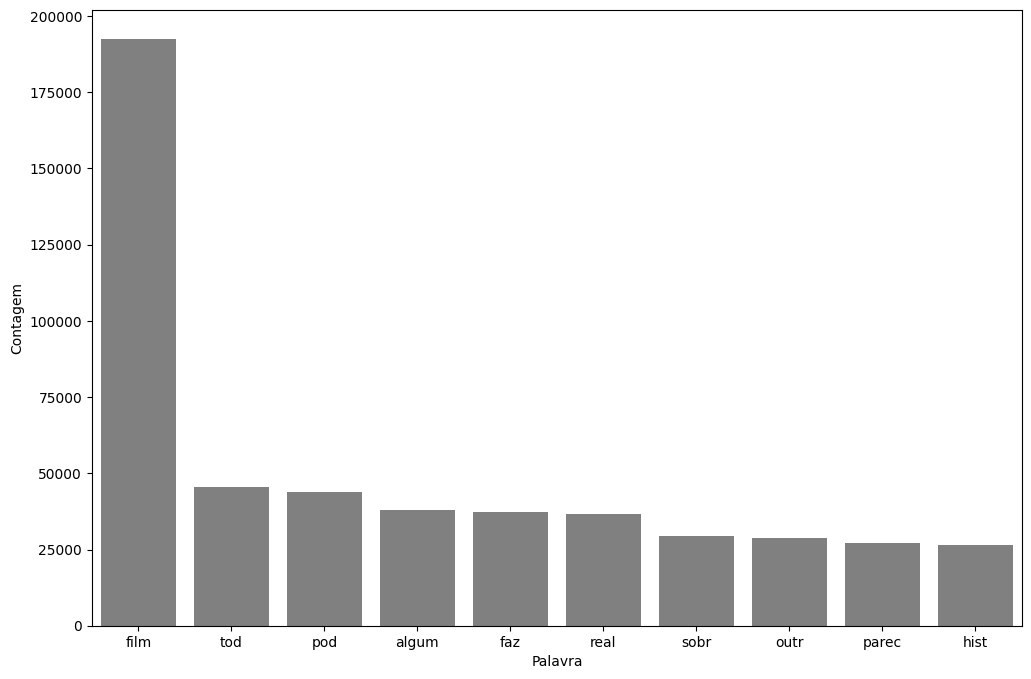

In [ ]:
pareto(resenha, 'tratamento_5', 10)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ['Assisti um filme ótimo', 'Assisti um filme péssimo']
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(caracteristicas.todense(), columns=tfidf.get_feature_names_out())

Assisti     filme   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [ ]:
tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, resenha['classificacao'], random_state=42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_bruto


0.6600889607763849

In [ ]:
tfidf_tratados = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, resenha['classificacao'], random_state=42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_tratados

0.6963202587949858

In [ ]:
from nltk import ngrams

frase = 'Assisti um ótimo filme.'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)


[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [ ]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha['classificacao'], random_state=42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_ngrams

0.8856449656287909

In [ ]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T, index=tfidf.get_feature_names_out())

pesos.nlargest(10,0)

0
otim      9.905861
excel     9.008890
perfeit   6.899348
maravilh  6.287748
favorit   5.890854
incri     5.762413
divert    5.386765
brilh     4.857927
ador      4.575856
hoj       4.492844

In [ ]:
pesos.nsmallest(10, 0)

0
ruim   -11.783101
pi     -11.462566
horri   -9.725877
terri   -8.404179
nad     -7.623785
chat    -7.517419
parec   -6.881806
nenhum  -6.380778
tent    -5.955765
mal     -5.712541